<a href="https://colab.research.google.com/github/pjs990301/New_York_City_Airbnb_Open_Data/blob/main/New_York_City_Airbnb_Open_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<h1><b>New York City Airbnb Open Data: Data Analysis</b></h1>**


---



## <b>The purpose of progressing</b>
The above data analysis was carried out as part of the Data Science Team project.


---



**We are going to analyze the data by conducting the End-to-End Process that we learned in data science.**
## <b>End-to-End Process</b>

1.   Objective Setting  
2.   Data Curation
3.   Data Inspection
4.   Data PreProcessing
5.   Data Analysis
6.   Evaluation
7.   Deployment


---




###<b> 1. Objective Setting & 2. Data Curation</b>## 

####**Background and Objective**

According to Investopedia, Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in specific locales. 

As a person who loves to travel, Airbnb has been our go-to platform to search for lodging, vacation rentals, and tourism activities. Aside from it being a much cheaper alternative than hotels, the convenience Airbnb provides is excellent, thanks to their own website/mobile application. 

With that in mind, We want to create a Data Visualization on the New York City Airbnb Dataset to understand the following:<br><br>

1.   Distribution of listings — (a) location, (b) room type
2.   Differences in the (a) price, (b) minimum nights, (c) number of reviews, and (d) availability per neighbourhood group and room type
3. Relationship between the dataset features
<br><br>

####**Context**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.<br><br>


####**Content**

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.<br><br>

####**Acknowledgements**

This public dataset is part of Airbnb, and the original source can be found on this website.<br><br>

####<b>Testing</b>
Hypothesis Testing will also be conducted to determine whether the observations that will arise in the Exploratory Data Analysis are statistically significant
<br><br>

**Ultimately, We will try to answer the problem statement and give a recommendation on what type of property to invest in and where**

---



### <b>3. Data Inspection & 4. Data PreProcessing</b>

#### **Specification**

   1.   <b>Importing Libraries</b><br>

   2.   <b>Loading the dataset</b> : <br>
    *   The shape of the dataset
    *   All the columns names of the dataset
    *   The datatypes of the dataset
    *   The dataset
    *   The statistical Analysis of Data

   3.   <b>Data Cleaning : </b><br>
    *   Check for the null values in each column
    *   Delete unnecessary columns
    *   Replace the 'reviews per month' by zero
    *   Remove the NaN values from the dataset

   4.   <b>Data Visualization : </b><br>
    *   Correlation between different variables
    *   Neighbourhood Group
    *   Neighbourhood
    *   Room Type
    *   Relation between neighbourgroup and Availability of Room
    *   Map of Neighbourhood Group
    *   Map of Room type
    *   Map of Availability of Room
    
   5.   <b>Data Exploration : </b><br>
    *   Find out Top 10 host
    *   Find out more about our neighbourhoods
    *   Find out top 10 neighbourhoods
    *   Scatterplot representation of availability_365 and price through latitude and longitude

















##### <h3><b>Importing Libraries

자체 제작 모듈<br>
https://test.pypi.org/project/NewYorkAirbnbOpenData/ <br>
https://github.com/pjs990301/New_York_City_Airbnb_Open_Data

In [1]:
pip install -i https://test.pypi.org/simple/ NewYorkAirbnbOpenData==0.0.8

Looking in indexes: https://test.pypi.org/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import warnings
import NewYorkAirbnbOpenData as nyc

warnings.filterwarnings('ignore')

# Change numeric expression
pd.options.display.float_format = '{:.2f}'.format

##### <h3><b>Loading Dataset

In [3]:
# Using pandas library and 'read_csv' function to read
airbnb = pd.read_csv('https://raw.githubusercontent.com/pjs990301/New_York_City_Airbnb_Open_Data/main/AB_NYC_2019.csv')

# Examing head of csv file
airbnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365


Print the Shape of the dataset


In [4]:
# Checking dataset shape
airbnb.shape

(48895, 16)

Print all the Columns names of the dataset

In [5]:
# Checking column names for datasets
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Print the Datatypes of the dataset


In [6]:
# Checking type of every column in the dataset
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
# Checking the overall information of the dataset
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Print the Dataset

In [8]:
# Printing dataset
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.68,-73.95,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70,-73.93,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81,-73.95,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.76,-73.99,Shared room,55,1,0,NaN,NaN,6,2


Print the Statistical Analysis of Data

In [9]:
# Printing Statistical Analysis of Data
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,38843.00,48895.00,48895.00
mean,19017143.24,67620010.65,40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,10983108.39,78610967.03,0.05,0.05,240.15,20.51,44.55,1.68,32.95,131.62
min,2539.00,2438.00,40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,9471945.00,7822033.00,40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,19677284.00,30793816.00,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,29152178.50,107434423.00,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,36487245.00,274321313.00,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


##### <h3><b>Data Cleaning</h3></b>

Check for the null values in each column

In [10]:
# Looking to find out first what columns have null values
# Using 'sum' function will show us how many nulls are found in each column in dataset
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Drop unnecessary columns

In [11]:
# Dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
airbnb.drop(['id','host_name','last_review'], axis=1, inplace=True)
#Examing the changes
airbnb.isnull().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Replace the 'reviews per month' by zero

In [12]:
# Replacing all NaN values in 'reviews_per_month' with 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)

# Examing changes
airbnb.reviews_per_month.isnull().sum()

0

Remove the NaN values from the dataset

In [13]:
airbnb.dropna(how='any',inplace=True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48879 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48879 non-null  int64  
 2   neighbourhood_group             48879 non-null  object 
 3   neighbourhood                   48879 non-null  object 
 4   latitude                        48879 non-null  float64
 5   longitude                       48879 non-null  float64
 6   room_type                       48879 non-null  object 
 7   price                           48879 non-null  int64  
 8   minimum_nights                  48879 non-null  int64  
 9   number_of_reviews               48879 non-null  int64  
 10  reviews_per_month               48879 non-null  float64
 11  calculated_host_listings_count  48879 non-null  int64  
 12  availability_365                

##### <h3><b>Data Visualization</h3></b>

Plot Correlation between different variables

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

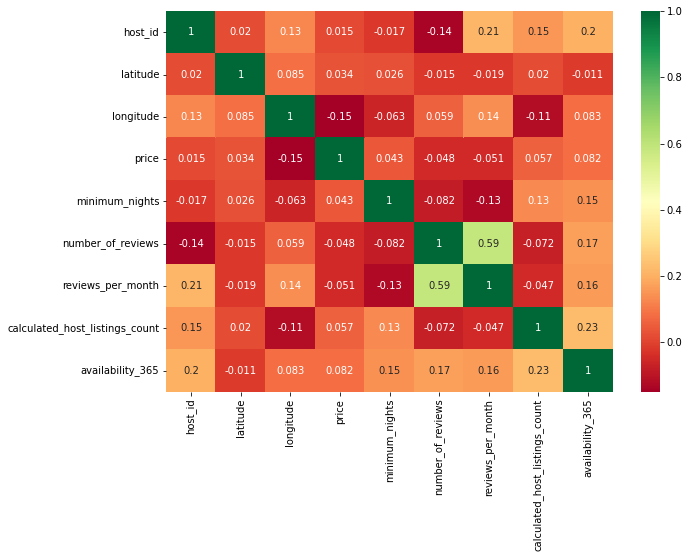

In [14]:
corr = airbnb.corr()
corr_feature = corr.columns
plt.figure(figsize=(10,7))
sns.heatmap(corr[corr_feature], annot=True,cmap="RdYlGn")
airbnb.columns

Plot Neighbourhood Group

In [15]:
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

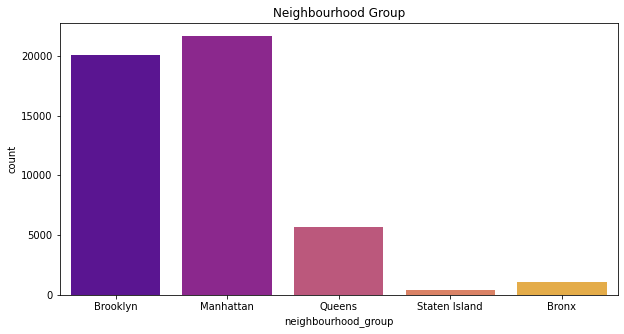

In [16]:
sns.countplot(airbnb['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('Neighbourhood Group')
plt.show()

Plot Neighbourhood


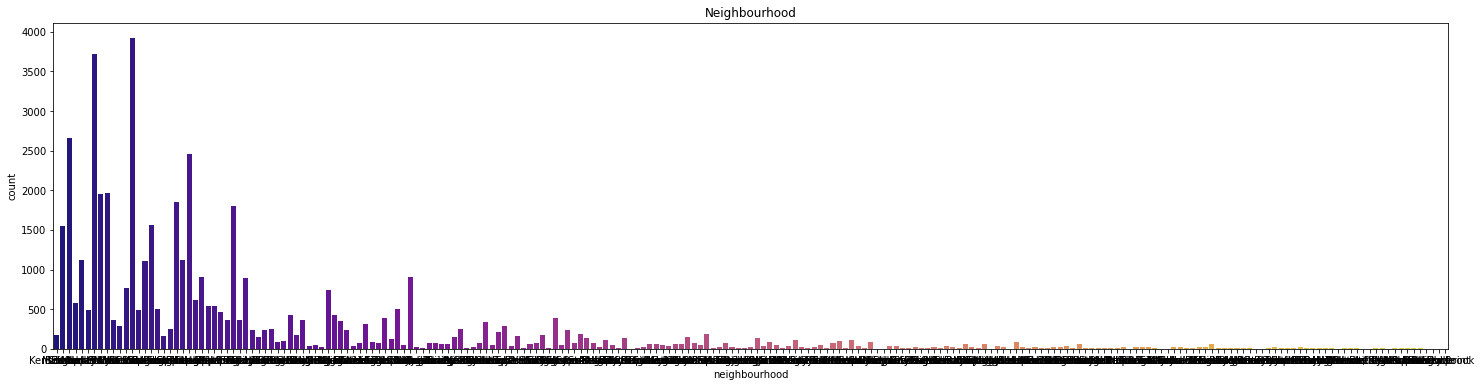

In [17]:
sns.countplot(airbnb['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')
plt.show()

Plot Room Type

In [18]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

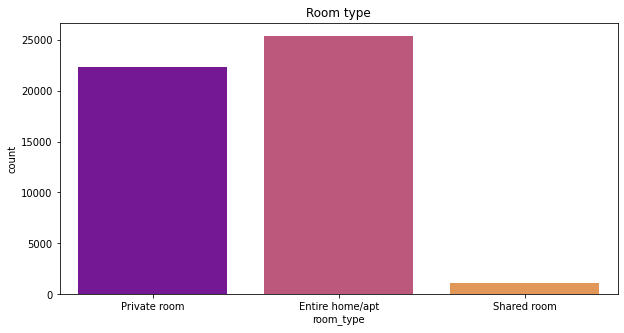

In [19]:
sns.countplot(airbnb['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('Room type')
plt.show()

Plot Relation between neighbourgroup and Availability of Room

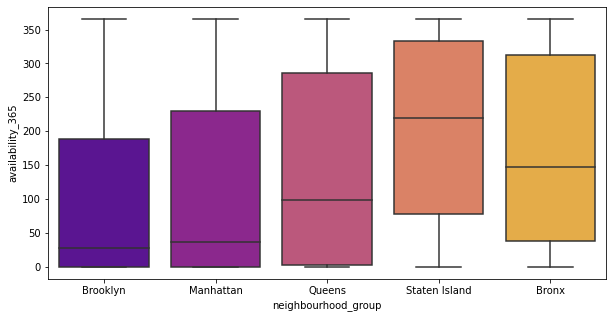

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette='plasma')
plt.show()

Plot Map of Neighbourhood Group

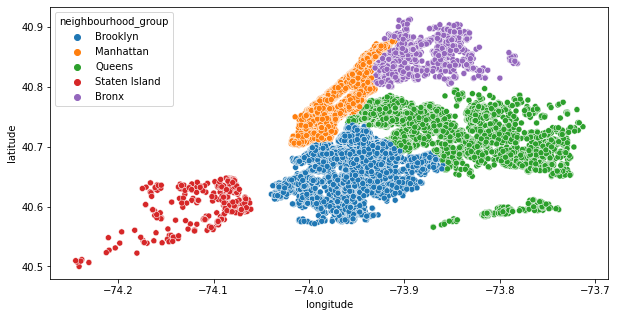

In [21]:
plt.figure(figsize=(10,5))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group)
plt.show()

Plot Map of Neighbourhood

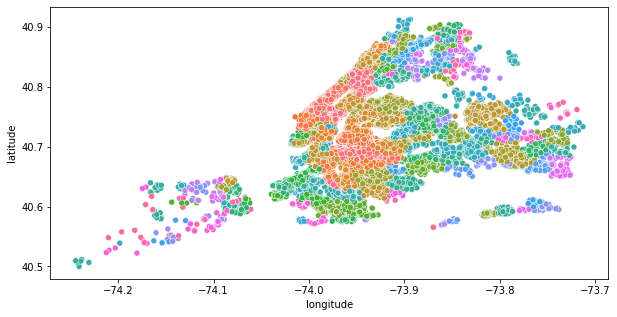

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood, legend = False)
plt.show()

Plot Map of Room type

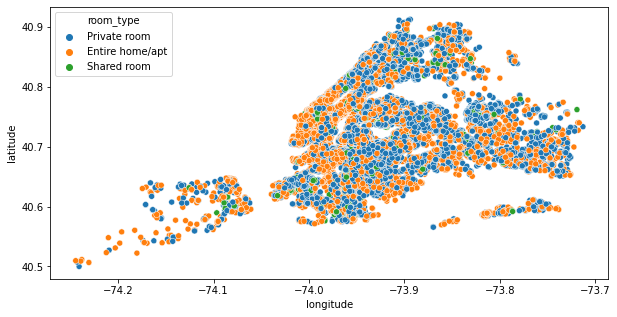

In [23]:
plt.figure(figsize=(10,5))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.room_type)
plt.show()

Plot Map of Availability of Room

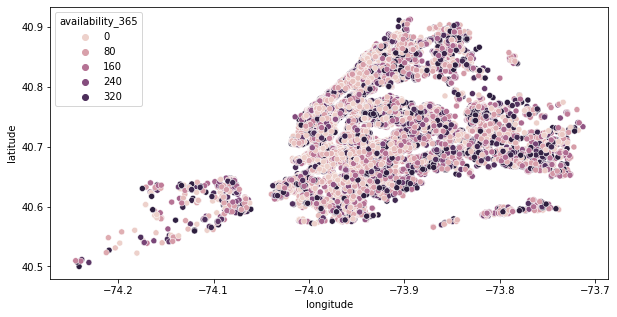

In [24]:
plt.figure(figsize=(10,5))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.availability_365)
plt.show()

##### <h3><b>Data Exploration</h3></b>

Find out Top 10 host

In [25]:
# Print what hosts have the most listings
top_host = airbnb.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
1475015       52
Name: host_id, dtype: int64

In [26]:
# Print what hosts have the most listings
top_host_check=airbnb.calculated_host_listings_count.max()
top_host_check

327

In [27]:
# Set figure size & style
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [28]:
# Make dataframe with Host_ID and P_count
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,1475015,52


[Text(0, 0, '1475015'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

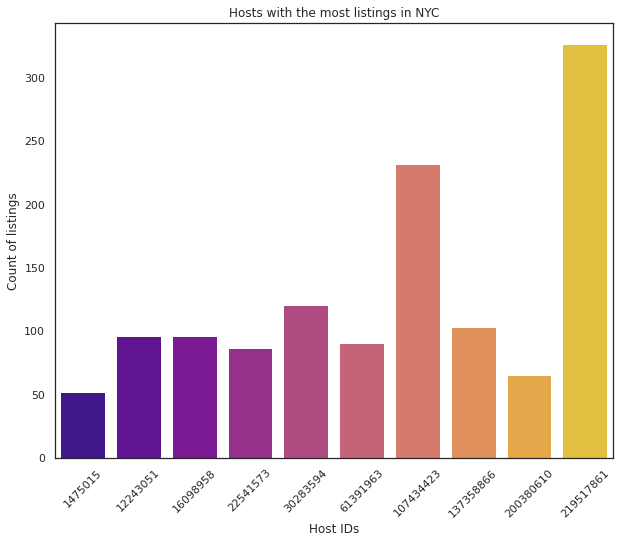

In [29]:
# Visualize the top host's id and count of listings
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='plasma')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

Find out more about our neighborhoods

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

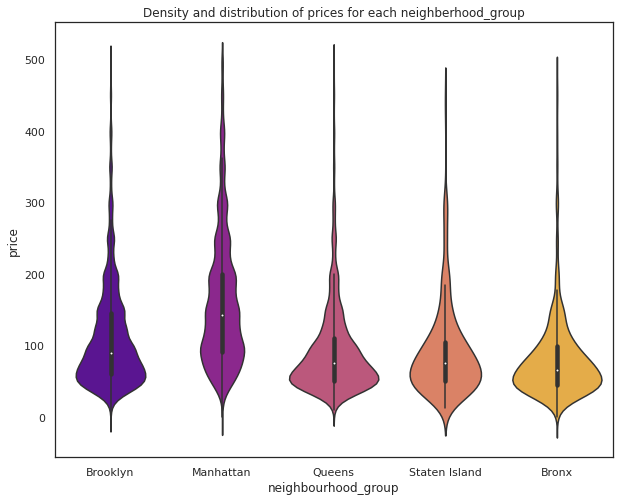

In [30]:
# Create sub-dataframe with no extreme valuses (less than 500)
sub_6=airbnb[airbnb.price < 500]

# Use violinplot to show density and distribution of prices
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price', palette='plasma')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

Find out top 10 neighbourhoods

In [31]:
# Find top 10 neighbourhoods
airbnb.neighbourhood.value_counts().head(10)

Williamsburg          3918
Bedford-Stuyvesant    3713
Harlem                2657
Bushwick              2463
Upper West Side       1970
Hell's Kitchen        1957
East Village          1852
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

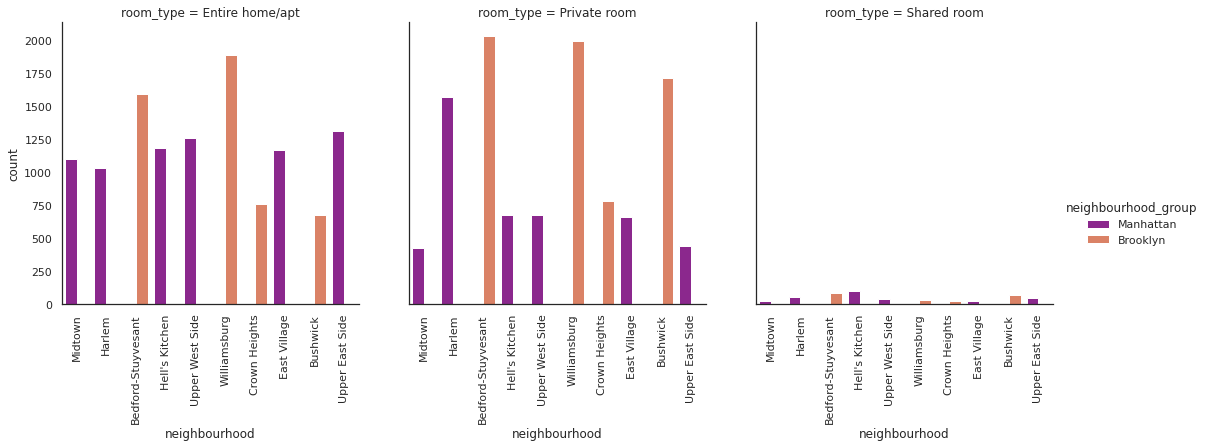

In [32]:
# Grab top 10 neighbourhoods for sub-dataframe
sub_7 = airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
viz_3 = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count', palette='plasma')
viz_3.set_xticklabels(rotation=90)

Scatterplot representation of availability_365 and price through latitude and longitude

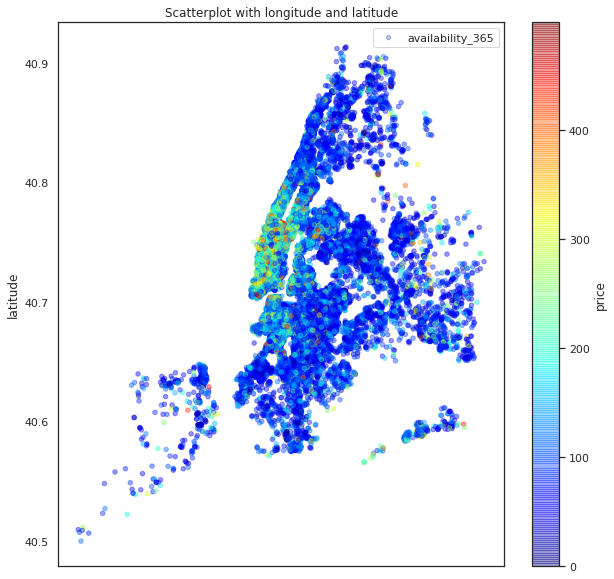

In [33]:
# Visualize with scatterplot
viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,10),title='Scatterplot with longitude and latitude')
viz_4.legend()

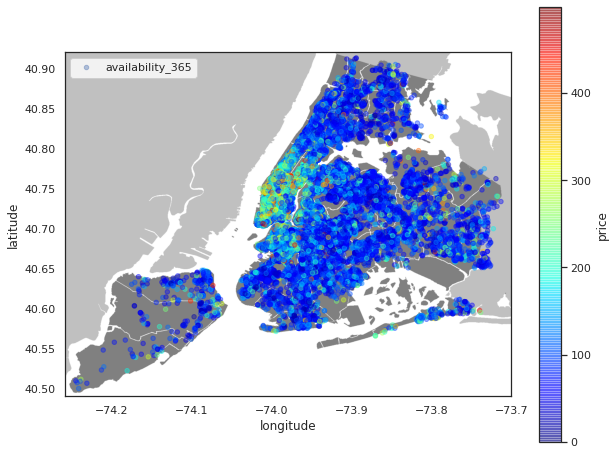

In [34]:
import urllib
# Initializing the figure size
plt.figure(figsize=(10,8))

# Loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)

# Scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

# Using scatterplot again
sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

##### <h3><b>Data scaling and encoding</h3></b>

In [35]:
data = airbnb
data.drop(['name','host_id'], axis = 1, inplace = True)

Extract Categorical features and Numerical features

In [36]:
categorical_features = data.select_dtypes(include=['object'])
print(categorical_features.head())
print('Categorical features: {}'.format(categorical_features.shape))

  neighbourhood_group neighbourhood        room_type
0            Brooklyn    Kensington     Private room
1           Manhattan       Midtown  Entire home/apt
2           Manhattan        Harlem     Private room
3            Brooklyn  Clinton Hill  Entire home/apt
4           Manhattan   East Harlem  Entire home/apt
Categorical features: (48879, 3)


In [37]:
numerical_features = data.select_dtypes(exclude=['object'])
print(numerical_features.head())
print('numerical_features features: {}'.format(numerical_features.shape))

   latitude  longitude  price  minimum_nights  number_of_reviews  \
0     40.65     -73.97    149               1                  9   
1     40.75     -73.98    225               1                 45   
2     40.81     -73.94    150               3                  0   
3     40.69     -73.96     89               1                270   
4     40.80     -73.94     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2               0.00                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0  
numerical_features features: (48879, 8)


Standard Scaling + Label Encoding



In [38]:
ss_label_X, ss_label_y, Processed_ss_label = nyc.Standard_Label(numerical_features,categorical_features)

In [39]:
Processed_ss_label

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type,price
0,-1.49,-0.44,-0.30,-0.32,-0.55,-0.03,1.92,1,108,1,149
1,0.45,-0.68,-0.30,0.49,-0.45,-0.16,1.84,2,127,0,225
2,1.47,0.22,-0.20,-0.52,-0.68,-0.19,1.92,2,94,1,150
3,-0.80,-0.16,-0.30,5.54,2.22,-0.19,0.62,1,41,0,89
4,1.28,0.18,0.15,-0.32,-0.62,-0.19,-0.86,2,61,0,80
...,...,...,...,...,...,...,...,...,...,...,...
48890,-0.92,0.05,-0.25,-0.52,-0.68,-0.16,-0.79,1,13,1,70
48891,-0.50,0.41,-0.15,-0.52,-0.68,-0.16,-0.58,1,28,1,40
48892,1.57,0.08,0.15,-0.52,-0.68,-0.19,-0.65,2,94,0,115
48893,0.52,-0.84,-0.30,-0.52,-0.68,-0.03,-0.84,2,95,2,55


Standard Scaling + OneHot Encoding


In [40]:
ss_oneHot_X,ss_oneHot_y, Processed_ss_oneHot = nyc.Standard_OneHot(numerical_features,categorical_features)

In [41]:
Processed_ss_oneHot

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_0,neighbourhood_group_1,neighbourhood_group_2,...,neighbourhood_215,neighbourhood_216,neighbourhood_217,neighbourhood_218,neighbourhood_219,neighbourhood_220,room_type_0,room_type_1,room_type_2,price
0,-1.49,-0.44,-0.30,-0.32,-0.55,-0.03,1.92,0,1,0,...,0,0,0,0,0,0,0,1,0,149
1,0.45,-0.68,-0.30,0.49,-0.45,-0.16,1.84,0,0,1,...,0,0,0,0,0,0,1,0,0,225
2,1.47,0.22,-0.20,-0.52,-0.68,-0.19,1.92,0,0,1,...,0,0,0,0,0,0,0,1,0,150
3,-0.80,-0.16,-0.30,5.54,2.22,-0.19,0.62,0,1,0,...,0,0,0,0,0,0,1,0,0,89
4,1.28,0.18,0.15,-0.32,-0.62,-0.19,-0.86,0,0,1,...,0,0,0,0,0,0,1,0,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,-0.92,0.05,-0.25,-0.52,-0.68,-0.16,-0.79,0,1,0,...,0,0,0,0,0,0,0,1,0,70
48891,-0.50,0.41,-0.15,-0.52,-0.68,-0.16,-0.58,0,1,0,...,0,0,0,0,0,0,0,1,0,40
48892,1.57,0.08,0.15,-0.52,-0.68,-0.19,-0.65,0,0,1,...,0,0,0,0,0,0,1,0,0,115
48893,0.52,-0.84,-0.30,-0.52,-0.68,-0.03,-0.84,0,0,1,...,0,0,0,0,0,0,0,0,1,55


Robust Scaling + Label Encoding


In [42]:
rs_label_X, rs_label_y, Processed_rs_label = nyc.Robust_Label(numerical_features,categorical_features)

In [43]:
Processed_rs_label

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type,price
0,-1.04,-0.36,-0.50,0.17,-0.10,5.00,1.41,1,108,1,149
1,0.42,-0.60,-0.50,1.74,0.01,1.00,1.37,2,127,0,225
2,1.18,0.29,0.00,-0.22,-0.24,0.00,1.41,2,94,1,150
3,-0.52,-0.09,-0.50,11.52,2.77,0.00,0.66,1,41,0,89
4,1.03,0.25,1.75,0.17,-0.18,0.00,-0.20,2,61,0,80
...,...,...,...,...,...,...,...,...,...,...,...
48890,-0.61,0.12,-0.25,-0.22,-0.24,1.00,-0.16,1,13,1,70
48891,-0.29,0.48,0.25,-0.22,-0.24,1.00,-0.04,1,28,1,40
48892,1.26,0.15,1.75,-0.22,-0.24,0.00,-0.08,2,94,0,115
48893,0.47,-0.76,-0.50,-0.22,-0.24,5.00,-0.19,2,95,2,55


Robust Scaling + OneHot Encoding

In [44]:
rs_oneHot_X, rs_oneHot_y, Processed_rs_oneHot = nyc.Robust_OneHot(numerical_features,categorical_features)

In [45]:
Processed_rs_oneHot

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_0,neighbourhood_group_1,neighbourhood_group_2,...,neighbourhood_215,neighbourhood_216,neighbourhood_217,neighbourhood_218,neighbourhood_219,neighbourhood_220,room_type_0,room_type_1,room_type_2,price
0,-1.04,-0.36,-0.50,0.17,-0.10,5.00,1.41,0,1,0,...,0,0,0,0,0,0,0,1,0,149
1,0.42,-0.60,-0.50,1.74,0.01,1.00,1.37,0,0,1,...,0,0,0,0,0,0,1,0,0,225
2,1.18,0.29,0.00,-0.22,-0.24,0.00,1.41,0,0,1,...,0,0,0,0,0,0,0,1,0,150
3,-0.52,-0.09,-0.50,11.52,2.77,0.00,0.66,0,1,0,...,0,0,0,0,0,0,1,0,0,89
4,1.03,0.25,1.75,0.17,-0.18,0.00,-0.20,0,0,1,...,0,0,0,0,0,0,1,0,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,-0.61,0.12,-0.25,-0.22,-0.24,1.00,-0.16,0,1,0,...,0,0,0,0,0,0,0,1,0,70
48891,-0.29,0.48,0.25,-0.22,-0.24,1.00,-0.04,0,1,0,...,0,0,0,0,0,0,0,1,0,40
48892,1.26,0.15,1.75,-0.22,-0.24,0.00,-0.08,0,0,1,...,0,0,0,0,0,0,1,0,0,115
48893,0.47,-0.76,-0.50,-0.22,-0.24,5.00,-0.19,0,0,1,...,0,0,0,0,0,0,0,0,1,55


Min-Max Scaling + Label Encoding

In [46]:
mms_label_X, mms_label_y, Processed_MinMax_label = nyc.MinMax_Label(numerical_features,categorical_features)

In [47]:
Processed_MinMax_label

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type,price
0,0.36,0.51,0.00,0.01,0.00,0.02,1.00,1,108,1,149
1,0.61,0.49,0.00,0.07,0.01,0.00,0.97,2,127,0,225
2,0.75,0.57,0.00,0.00,0.00,0.00,1.00,2,94,1,150
3,0.45,0.54,0.00,0.43,0.08,0.00,0.53,1,41,0,89
4,0.72,0.57,0.01,0.01,0.00,0.00,0.00,2,61,0,80
...,...,...,...,...,...,...,...,...,...,...,...
48890,0.43,0.55,0.00,0.00,0.00,0.00,0.02,1,13,1,70
48891,0.49,0.59,0.00,0.00,0.00,0.00,0.10,1,28,1,40
48892,0.76,0.56,0.01,0.00,0.00,0.00,0.07,2,94,0,115
48893,0.62,0.48,0.00,0.00,0.00,0.02,0.01,2,95,2,55


Min-Max Scaling + OneHot Encoding

In [48]:
mms_oneHot_X, mms_oneHot_y, Processed_MinMax_oneHot = nyc.Robust_OneHot(numerical_features,categorical_features)

In [49]:
Processed_MinMax_oneHot

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_0,neighbourhood_group_1,neighbourhood_group_2,...,neighbourhood_215,neighbourhood_216,neighbourhood_217,neighbourhood_218,neighbourhood_219,neighbourhood_220,room_type_0,room_type_1,room_type_2,price
0,-1.04,-0.36,-0.50,0.17,-0.10,5.00,1.41,0,1,0,...,0,0,0,0,0,0,0,1,0,149
1,0.42,-0.60,-0.50,1.74,0.01,1.00,1.37,0,0,1,...,0,0,0,0,0,0,1,0,0,225
2,1.18,0.29,0.00,-0.22,-0.24,0.00,1.41,0,0,1,...,0,0,0,0,0,0,0,1,0,150
3,-0.52,-0.09,-0.50,11.52,2.77,0.00,0.66,0,1,0,...,0,0,0,0,0,0,1,0,0,89
4,1.03,0.25,1.75,0.17,-0.18,0.00,-0.20,0,0,1,...,0,0,0,0,0,0,1,0,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,-0.61,0.12,-0.25,-0.22,-0.24,1.00,-0.16,0,1,0,...,0,0,0,0,0,0,0,1,0,70
48891,-0.29,0.48,0.25,-0.22,-0.24,1.00,-0.04,0,1,0,...,0,0,0,0,0,0,0,1,0,40
48892,1.26,0.15,1.75,-0.22,-0.24,0.00,-0.08,0,0,1,...,0,0,0,0,0,0,1,0,0,115
48893,0.47,-0.76,-0.50,-0.22,-0.24,5.00,-0.19,0,0,1,...,0,0,0,0,0,0,0,0,1,55


##### <h3><b>Feature Selection</h3></b>

Standard Scaling + Label Encoding + selectKBest



In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
bestfeatures = SelectKBest(score_func=f_regression, k=10) 
fit = bestfeatures.fit(ss_label_X, ss_label_y)
dfcolumns = pd.DataFrame(ss_label_X.columns)
dfscores = pd.DataFrame(fit.scores_)
featureScores = pd.concat([dfcolumns, dfscores],axis=1) 
featureScores.columns = ['Column','Score']
print(featureScores.nlargest(20,'Score'))

featurScores_ss_label = featureScores[(featureScores['Score']>=100)]

                           Column   Score
9                       room_type 3239.28
1                       longitude 1124.68
6                availability_365  329.29
8                   neighbourhood  189.22
5  calculated_host_listings_count  161.97
4               reviews_per_month  125.34
3               number_of_reviews  112.70
7             neighbourhood_group   95.68
2                  minimum_nights   89.74
0                        latitude   56.37


In [51]:
featurScores_ss_label['Column']

1                         longitude
3                 number_of_reviews
4                 reviews_per_month
5    calculated_host_listings_count
6                  availability_365
8                     neighbourhood
9                         room_type
Name: Column, dtype: object

Standard Scaling + OneHot Encoding + selectKBest



In [52]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
bestfeatures = SelectKBest(score_func=f_regression, k=10) 
fit = bestfeatures.fit(ss_oneHot_X,ss_oneHot_y)
dfcolumns = pd.DataFrame(ss_oneHot_X.columns)
dfscores = pd.DataFrame(fit.scores_)
featureScores = pd.concat([dfcolumns, dfscores],axis=1) 
featureScores.columns = ['Column','Score'] 
print(featureScores.nlargest(20,'Score'))

featurScores_ss_oneHot = featureScores[(featureScores['Score']>=100)]

                             Column   Score
233                     room_type_0 3422.17
234                     room_type_1 2992.45
9             neighbourhood_group_2 1349.92
1                         longitude 1124.68
8             neighbourhood_group_1  479.39
139               neighbourhood_127  471.85
209               neighbourhood_197  354.16
6                  availability_365  329.29
10            neighbourhood_group_3  316.51
40                 neighbourhood_28  208.32
46                 neighbourhood_34  186.52
221               neighbourhood_209  179.40
5    calculated_host_listings_count  161.97
25                 neighbourhood_13  141.67
235                     room_type_2  140.96
4                 reviews_per_month  125.34
214               neighbourhood_202  121.04
190               neighbourhood_178  113.15
3                 number_of_reviews  112.70
107                neighbourhood_95   96.03


In [53]:
featurScores_ss_oneHot['Column']

1                           longitude
3                   number_of_reviews
4                   reviews_per_month
5      calculated_host_listings_count
6                    availability_365
8               neighbourhood_group_1
9               neighbourhood_group_2
10              neighbourhood_group_3
25                   neighbourhood_13
40                   neighbourhood_28
46                   neighbourhood_34
139                 neighbourhood_127
190                 neighbourhood_178
209                 neighbourhood_197
214                 neighbourhood_202
221                 neighbourhood_209
233                       room_type_0
234                       room_type_1
235                       room_type_2
Name: Column, dtype: object

Robust Scaling + Label Encoding + selectKBest

In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
bestfeatures = SelectKBest(score_func=f_regression, k=10) 
fit = bestfeatures.fit(rs_label_X, rs_label_y)
dfcolumns = pd.DataFrame(rs_label_X.columns)
dfscores = pd.DataFrame(fit.scores_)
featureScores = pd.concat([dfcolumns, dfscores],axis=1) 
featureScores.columns = ['Column','Score'] 
print(featureScores.nlargest(20,'Score'))

featurScores_rs_label = featureScores[(featureScores['Score']>=100)]

                           Column   Score
9                       room_type 3239.28
1                       longitude 1124.68
6                availability_365  329.29
8                   neighbourhood  189.22
5  calculated_host_listings_count  161.97
4               reviews_per_month  125.34
3               number_of_reviews  112.70
7             neighbourhood_group   95.68
2                  minimum_nights   89.74
0                        latitude   56.37


In [55]:
featurScores_rs_label['Column']

1                         longitude
3                 number_of_reviews
4                 reviews_per_month
5    calculated_host_listings_count
6                  availability_365
8                     neighbourhood
9                         room_type
Name: Column, dtype: object

Robust Scaling + OneHot Encoding + selectKBest

In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
bestfeatures = SelectKBest(score_func=f_regression, k=10) 
fit = bestfeatures.fit(rs_oneHot_X, rs_oneHot_y)
dfcolumns = pd.DataFrame(rs_oneHot_X.columns)
dfscores = pd.DataFrame(fit.scores_)
featureScores = pd.concat([dfcolumns, dfscores],axis=1) 
featureScores.columns = ['Column','Score'] 
print(featureScores.nlargest(20,'Score'))

featurScores_rs_oneHot = featureScores[(featureScores['Score']>=100)]

                             Column   Score
233                     room_type_0 3422.17
234                     room_type_1 2992.45
9             neighbourhood_group_2 1349.92
1                         longitude 1124.68
8             neighbourhood_group_1  479.39
139               neighbourhood_127  471.85
209               neighbourhood_197  354.16
6                  availability_365  329.29
10            neighbourhood_group_3  316.51
40                 neighbourhood_28  208.32
46                 neighbourhood_34  186.52
221               neighbourhood_209  179.40
5    calculated_host_listings_count  161.97
25                 neighbourhood_13  141.67
235                     room_type_2  140.96
4                 reviews_per_month  125.34
214               neighbourhood_202  121.04
190               neighbourhood_178  113.15
3                 number_of_reviews  112.70
107                neighbourhood_95   96.03


In [57]:
featurScores_rs_oneHot['Column']

1                           longitude
3                   number_of_reviews
4                   reviews_per_month
5      calculated_host_listings_count
6                    availability_365
8               neighbourhood_group_1
9               neighbourhood_group_2
10              neighbourhood_group_3
25                   neighbourhood_13
40                   neighbourhood_28
46                   neighbourhood_34
139                 neighbourhood_127
190                 neighbourhood_178
209                 neighbourhood_197
214                 neighbourhood_202
221                 neighbourhood_209
233                       room_type_0
234                       room_type_1
235                       room_type_2
Name: Column, dtype: object

Min-Max Scaling + Label Encoding + selectKBest

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
bestfeatures = SelectKBest(score_func=f_regression, k=10) 
fit = bestfeatures.fit(mms_label_X, mms_label_y)
dfcolumns = pd.DataFrame(mms_label_X.columns)
dfscores = pd.DataFrame(fit.scores_)
featureScores = pd.concat([dfcolumns, dfscores],axis=1) 
featureScores.columns = ['Column','Score'] 
print(featureScores.nlargest(20,'Score'))

featurScores_mmc_label = featureScores[(featureScores['Score']>=100)]

                           Column   Score
9                       room_type 3239.28
1                       longitude 1124.68
6                availability_365  329.29
8                   neighbourhood  189.22
5  calculated_host_listings_count  161.97
4               reviews_per_month  125.34
3               number_of_reviews  112.70
7             neighbourhood_group   95.68
2                  minimum_nights   89.74
0                        latitude   56.37


In [59]:
featurScores_mmc_label['Column']

1                         longitude
3                 number_of_reviews
4                 reviews_per_month
5    calculated_host_listings_count
6                  availability_365
8                     neighbourhood
9                         room_type
Name: Column, dtype: object

Min-Max Scaling + OneHot Encoding + selectKBest

In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
bestfeatures = SelectKBest(score_func=f_regression, k=10) 
fit = bestfeatures.fit(mms_oneHot_X, mms_oneHot_y)
dfcolumns = pd.DataFrame(mms_oneHot_X.columns)
dfscores = pd.DataFrame(fit.scores_)
featureScores = pd.concat([dfcolumns, dfscores],axis=1) 
featureScores.columns = ['Column','Score'] 
print(featureScores.nlargest(20,'Score'))

featurScores_mmc_oneHot = featureScores[(featureScores['Score']>=100)]

                             Column   Score
233                     room_type_0 3422.17
234                     room_type_1 2992.45
9             neighbourhood_group_2 1349.92
1                         longitude 1124.68
8             neighbourhood_group_1  479.39
139               neighbourhood_127  471.85
209               neighbourhood_197  354.16
6                  availability_365  329.29
10            neighbourhood_group_3  316.51
40                 neighbourhood_28  208.32
46                 neighbourhood_34  186.52
221               neighbourhood_209  179.40
5    calculated_host_listings_count  161.97
25                 neighbourhood_13  141.67
235                     room_type_2  140.96
4                 reviews_per_month  125.34
214               neighbourhood_202  121.04
190               neighbourhood_178  113.15
3                 number_of_reviews  112.70
107                neighbourhood_95   96.03


In [61]:
featurScores_mmc_oneHot['Column']

1                           longitude
3                   number_of_reviews
4                   reviews_per_month
5      calculated_host_listings_count
6                    availability_365
8               neighbourhood_group_1
9               neighbourhood_group_2
10              neighbourhood_group_3
25                   neighbourhood_13
40                   neighbourhood_28
46                   neighbourhood_34
139                 neighbourhood_127
190                 neighbourhood_178
209                 neighbourhood_197
214                 neighbourhood_202
221                 neighbourhood_209
233                       room_type_0
234                       room_type_1
235                       room_type_2
Name: Column, dtype: object

### <b>5. Data Analysis </b>

#### **Specification**
1.   <b>Importing Libaries </b>
2.   <b>Regression </b><br>
      *   Standard Scaling + Label Encoding + LinearRegression
      *   Standard Scaling + OneHot Encoding + LinearRegression
      *   Robust Scaling + Label Encoding + LinearRegression
      *   Robust Scaling + OneHot Encoding + LinearRegression
      *   Min-Max Scaling + Label Encoding + LinearRegression
      *   Min-Max Scaling + OneHot Encoding + LinearRegression
3.   <b>Regression </b><br>
      *   Standard Scaling + Label Encoding + ExtraTreesClassifier
      *   Standard Scaling + OneHot Encoding + ExtraTreesClassifier
      *   Robust Scaling + Label Encoding + ExtraTreesClassifier
      *   Robust Scaling + OneHot Encoding + ExtraTreesClassifier
      *   Min-Max Scaling + Label Encoding + ExtraTreesClassifier
      *   Min-Max Scaling + OneHot Encoding + ExtraTreesClassifier

##### <h3><b>Importing Libraries

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

pd.options.display.float_format = '{:.17f}'.format

In [63]:
score = pd.DataFrame(columns=['Scaling','Encoding','Algorithm','Score','MAE','RMSE','MAPE'])

##### <h3><b>Regression</b></h3>

###### <h6><b>Standard Scaling + Label Encoding + LinearRegression</b></h6>

In [64]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(ss_label_X[featurScores_ss_label['Column']], ss_label_y, 0.2, 42) 

Dimensions of the training feature matrix: (39103, 7)
Dimensions of the training target vector: (39103, 1)
Dimensions of the test feature matrix: (9776, 7)
Dimensions of the test target vector: (9776, 1)


In [65]:
X_train

,longitude,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood,room_type
21631,-0.04336399841236960,-0.29808098083004025,-0.45776916310927113,-0.18647984038041757,0.95896296501315048,214,0
41084,0.30672645897570744,-0.43274390771528676,-0.11972340328505654,-0.18647984038041757,-0.27192805843385975,175,1
4162,0.26686467422356763,0.01613251523553484,-0.28874628319716383,-0.18647984038041757,1.55921229126200123,206,1
43026,-0.73119642552052533,-0.45518772886282782,0.44368619642196772,-0.18647984038041757,0.77660873931729713,95,0
48062,-0.03274863182079225,-0.50007537115791001,-0.05712233665094275,-0.18647984038041757,1.48323136388872912,214,0
...,...,...,...,...,...,...,...
11292,1.26232609235379889,1.51986853212078721,0.63774950298772037,-0.15613764195511029,-0.47707656234169482,104,0
44748,-0.63934100848314646,-0.38785626542020457,1.36392187594344061,-0.18647984038041757,0.52587167898549880,86,0
38174,-0.12720373047234074,-0.50007537115791001,-0.58297129637749867,-0.18647984038041757,-0.85698119920805593,51,0
860,-0.60077906453824548,-0.27563715968249919,-0.60175161636773289,-0.18647984038041757,-0.84178501373340153,202,0


In [66]:
#Prepare a Linear Regression Model
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
SLL_score = r2_score(y_test,y_pred)
SLL_MAE = mean_absolute_error(y_test, y_pred)
SLL_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
SLL_MAPE = mean_absolute_percentage_error(y_test, y_pred)

In [67]:
score.loc[len(score)]=['Standard','Label','LinearRegression',SLL_score,SLL_MAE,SLL_RMSE,SLL_MAPE]

###### <h6><b>Standard Scaling + OneHot Encoding + LinearRegression</b></h6>

In [68]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(ss_oneHot_X, ss_oneHot_y, 0.2, 42) 

Dimensions of the training feature matrix: (39103, 236)
Dimensions of the training target vector: (39103, 1)
Dimensions of the test feature matrix: (9776, 236)
Dimensions of the test target vector: (9776, 1)


In [69]:
X_train

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_0,neighbourhood_group_1,neighbourhood_group_2,...,neighbourhood_214,neighbourhood_215,neighbourhood_216,neighbourhood_217,neighbourhood_218,neighbourhood_219,neighbourhood_220,room_type_0,room_type_1,room_type_2
21631,-0.39437142877280418,-0.04336399841236960,-0.05051146866071524,-0.29808098083004025,-0.45776916310927113,-0.18647984038041757,0.95896296501315048,0,1,0,...,1,0,0,0,0,0,0,1,0,0
41084,-2.63833046613890021,0.30672645897570744,-0.30031417988608861,-0.43274390771528676,-0.11972340328505654,-0.18647984038041757,-0.27192805843385975,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4162,2.07387347837910907,0.26686467422356763,-0.25035363764101393,0.01613251523553484,-0.28874628319716383,-0.18647984038041757,1.55921229126200123,0,0,1,...,0,0,0,0,0,0,0,0,1,0
43026,0.62912770391274364,-0.73119642552052533,-0.20039309539593925,-0.45518772886282782,0.44368619642196772,-0.18647984038041757,0.77660873931729713,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48062,-0.37768294622937881,-0.03274863182079225,-0.25035363764101393,-0.50007537115791001,-0.05712233665094275,-0.18647984038041757,1.48323136388872912,0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292,0.40722590306179413,1.26232609235379889,-0.20039309539593925,1.51986853212078721,0.63774950298772037,-0.15613764195511029,-0.47707656234169482,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44748,0.15598171532139288,-0.63934100848314646,-0.10047201090578990,-0.38785626542020457,1.36392187594344061,-0.18647984038041757,0.52587167898549880,0,0,1,...,0,0,0,0,0,0,0,1,0,0
38174,-1.02614969648497256,-0.12720373047234074,-0.15043255315086457,-0.50007537115791001,-0.58297129637749867,-0.18647984038041757,-0.85698119920805593,0,1,0,...,0,0,0,0,0,0,0,1,0,0
860,0.84607797697623088,-0.60077906453824548,-0.25035363764101393,-0.27563715968249919,-0.60175161636773289,-0.18647984038041757,-0.84178501373340153,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [70]:
#Prepare a Linear Regression Model
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
SOL_score = r2_score(y_test,y_pred)
SOL_MAE = mean_absolute_error(y_test, y_pred)
SOL_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
SOL_MAPE = mean_absolute_percentage_error(y_test, y_pred)

In [71]:
score.loc[len(score)]=['Standard','OneHot','LinearRegression',SOL_score,SOL_MAE,SOL_RMSE,SOL_MAPE]

###### <h6><b>Robust Scaling + Label Encoding + LinearRegression</b></h6>

In [72]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(rs_label_X, rs_label_y, 0.2, 42) 

Dimensions of the training feature matrix: (39103, 10)
Dimensions of the training target vector: (39103, 1)
Dimensions of the test feature matrix: (9776, 10)
Dimensions of the test target vector: (9776, 1)


In [73]:
X_train

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
21631,-0.21418789372781208,0.03227185295995039,0.75000000000000000,0.21739130434782608,-0.00649350649350650,0.00000000000000000,0.85462555066079293,1,214,0
41084,-1.88989317995077943,0.37764479589644939,-0.50000000000000000,-0.04347826086956522,0.34415584415584416,0.00000000000000000,0.14096916299559473,1,175,1
4162,1.62900575184879082,0.33832015387889564,-0.25000000000000000,0.82608695652173914,0.16883116883116883,0.00000000000000000,1.20264317180616742,2,206,1
43026,0.55012325390299177,-0.64629194272261425,0.00000000000000000,-0.08695652173913043,0.92857142857142860,0.00000000000000000,0.74889867841409696,2,95,0
48062,-0.20172555464256647,0.04274417610590462,-0.25000000000000000,-0.17391304347826086,0.40909090909090906,0.00000000000000000,1.15859030837004395,1,214,0
...,...,...,...,...,...,...,...,...,...,...
11292,0.38441522870446088,1.32036759991444619,0.00000000000000000,3.73913043478260887,1.12987012987012969,1.00000000000000000,0.02202643171806168,3,104,0
44748,0.19679539852094796,-0.55567428937797492,0.50000000000000000,0.04347826086956522,1.88311688311688297,0.00000000000000000,0.60352422907488990,2,86,0
38174,-0.68597644480970499,-0.05043812780499782,0.25000000000000000,-0.17391304347826086,-0.13636363636363635,0.00000000000000000,-0.19823788546255505,1,51,0
860,0.71213366201040618,-0.51763197264370464,-0.25000000000000000,0.26086956521739130,-0.15584415584415584,0.00000000000000000,-0.18942731277533040,2,202,0


In [74]:
#Prepare a Linear Regression Model
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
RLL_score = r2_score(y_test,y_pred)
RLL_MAE = mean_absolute_error(y_test, y_pred)
RLL_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RLL_MAPE = mean_absolute_percentage_error(y_test, y_pred)

In [75]:
score.loc[len(score)]=['Robust','Label','LinearRegression',RLL_score,RLL_MAE,RLL_RMSE,RLL_MAPE]

###### <h6><b>Robust Scaling + OneHot Encoding + LinearRegression</b></h6>

In [76]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(rs_oneHot_X, rs_oneHot_y, 0.2, 42) 

Dimensions of the training feature matrix: (39103, 236)
Dimensions of the training target vector: (39103, 1)
Dimensions of the test feature matrix: (9776, 236)
Dimensions of the test target vector: (9776, 1)


In [77]:
X_train

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_0,neighbourhood_group_1,neighbourhood_group_2,...,neighbourhood_214,neighbourhood_215,neighbourhood_216,neighbourhood_217,neighbourhood_218,neighbourhood_219,neighbourhood_220,room_type_0,room_type_1,room_type_2
21631,-0.21418789372781208,0.03227185295995039,0.75000000000000000,0.21739130434782608,-0.00649350649350650,0.00000000000000000,0.85462555066079293,0,1,0,...,1,0,0,0,0,0,0,1,0,0
41084,-1.88989317995077943,0.37764479589644939,-0.50000000000000000,-0.04347826086956522,0.34415584415584416,0.00000000000000000,0.14096916299559473,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4162,1.62900575184879082,0.33832015387889564,-0.25000000000000000,0.82608695652173914,0.16883116883116883,0.00000000000000000,1.20264317180616742,0,0,1,...,0,0,0,0,0,0,0,0,1,0
43026,0.55012325390299177,-0.64629194272261425,0.00000000000000000,-0.08695652173913043,0.92857142857142860,0.00000000000000000,0.74889867841409696,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48062,-0.20172555464256647,0.04274417610590462,-0.25000000000000000,-0.17391304347826086,0.40909090909090906,0.00000000000000000,1.15859030837004395,0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292,0.38441522870446088,1.32036759991444619,0.00000000000000000,3.73913043478260887,1.12987012987012969,1.00000000000000000,0.02202643171806168,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44748,0.19679539852094796,-0.55567428937797492,0.50000000000000000,0.04347826086956522,1.88311688311688297,0.00000000000000000,0.60352422907488990,0,0,1,...,0,0,0,0,0,0,0,1,0,0
38174,-0.68597644480970499,-0.05043812780499782,0.25000000000000000,-0.17391304347826086,-0.13636363636363635,0.00000000000000000,-0.19823788546255505,0,1,0,...,0,0,0,0,0,0,0,1,0,0
860,0.71213366201040618,-0.51763197264370464,-0.25000000000000000,0.26086956521739130,-0.15584415584415584,0.00000000000000000,-0.18942731277533040,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [78]:
#Prepare a Linear Regression Model
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
ROL_score = r2_score(y_test,y_pred)
ROL_MAE = mean_absolute_error(y_test, y_pred)
ROL_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
ROL_MAPE = mean_absolute_percentage_error(y_test, y_pred)

In [79]:
score.loc[len(score)]=['Robust','OneHot','LinearRegression',ROL_score,ROL_MAE,ROL_RMSE,ROL_MAPE]

###### <h6><b>Min-Max Scaling + Label Encoding + LinearRegression</b></h6>

In [80]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(mms_label_X, mms_label_y, 0.2, 42) 

Dimensions of the training feature matrix: (39103, 10)
Dimensions of the training target vector: (39103, 1)
Dimensions of the test feature matrix: (9776, 10)
Dimensions of the test target vector: (9776, 1)


In [81]:
X_train

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
21631,0.50245602148716273,0.54616788664546334,0.00400320256204964,0.01589825119236884,0.00615384615384615,0.00000000000000000,0.65479452054794518,1,214,0
41084,0.20637839668981428,0.57657640705266999,0.00000000000000000,0.00635930047694754,0.01538461538461539,0.00000000000000000,0.21095890410958903,1,175,1
4162,0.82812689041062981,0.57311405076868027,0.00080064051240993,0.03815580286168522,0.01076923076923077,0.00000000000000000,0.87123287671232874,2,206,1
43026,0.63750090739709719,0.48642342359295299,0.00160128102481986,0.00476947535771065,0.03076923076923077,0.00000000000000000,0.58904109589041098,2,95,0
48062,0.50465797178600269,0.54708992717760907,0.00080064051240993,0.00158982511923688,0.01709401709401710,0.00000000000000000,0.84383561643835614,1,214,0
...,...,...,...,...,...,...,...,...,...,...
11292,0.60822222759939848,0.65957887209981436,0.00160128102481986,0.14467408585055644,0.03606837606837607,0.00306748466257669,0.13698630136986301,3,104,0
44748,0.57507198683670424,0.49440189676909085,0.00320256204963971,0.00953895071542130,0.05589743589743591,0.00000000000000000,0.49863013698630138,2,86,0
38174,0.41909647445979203,0.53888564815687801,0.00240192153722978,0.00158982511923688,0.00273504273504274,0.00000000000000000,0.00000000000000000,1,51,0
860,0.66612626128197405,0.49775135013078398,0.00080064051240993,0.01748807631160573,0.00222222222222222,0.00000000000000000,0.00547945205479452,2,202,0


In [82]:
#Prepare a Linear Regression Model
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
MLL_score = r2_score(y_test,y_pred)
MLL_MAE = mean_absolute_error(y_test, y_pred)
MLL_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
MLL_MAPE = mean_absolute_percentage_error(y_test, y_pred)

In [83]:
score.loc[len(score)]=['Min-Max','Label','LinearRegression',MLL_score,MLL_MAE,MLL_RMSE,MLL_MAPE]

###### <h6><b>Min-Max Scaling + OneHot Encoding + LinearRegression</b></h6>

In [84]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(mms_oneHot_X, mms_oneHot_y, 0.2, 42) 

Dimensions of the training feature matrix: (39103, 236)
Dimensions of the training target vector: (39103, 1)
Dimensions of the test feature matrix: (9776, 236)
Dimensions of the test target vector: (9776, 1)


In [85]:
X_train

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_0,neighbourhood_group_1,neighbourhood_group_2,...,neighbourhood_214,neighbourhood_215,neighbourhood_216,neighbourhood_217,neighbourhood_218,neighbourhood_219,neighbourhood_220,room_type_0,room_type_1,room_type_2
21631,-0.21418789372781208,0.03227185295995039,0.75000000000000000,0.21739130434782608,-0.00649350649350650,0.00000000000000000,0.85462555066079293,0,1,0,...,1,0,0,0,0,0,0,1,0,0
41084,-1.88989317995077943,0.37764479589644939,-0.50000000000000000,-0.04347826086956522,0.34415584415584416,0.00000000000000000,0.14096916299559473,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4162,1.62900575184879082,0.33832015387889564,-0.25000000000000000,0.82608695652173914,0.16883116883116883,0.00000000000000000,1.20264317180616742,0,0,1,...,0,0,0,0,0,0,0,0,1,0
43026,0.55012325390299177,-0.64629194272261425,0.00000000000000000,-0.08695652173913043,0.92857142857142860,0.00000000000000000,0.74889867841409696,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48062,-0.20172555464256647,0.04274417610590462,-0.25000000000000000,-0.17391304347826086,0.40909090909090906,0.00000000000000000,1.15859030837004395,0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292,0.38441522870446088,1.32036759991444619,0.00000000000000000,3.73913043478260887,1.12987012987012969,1.00000000000000000,0.02202643171806168,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44748,0.19679539852094796,-0.55567428937797492,0.50000000000000000,0.04347826086956522,1.88311688311688297,0.00000000000000000,0.60352422907488990,0,0,1,...,0,0,0,0,0,0,0,1,0,0
38174,-0.68597644480970499,-0.05043812780499782,0.25000000000000000,-0.17391304347826086,-0.13636363636363635,0.00000000000000000,-0.19823788546255505,0,1,0,...,0,0,0,0,0,0,0,1,0,0
860,0.71213366201040618,-0.51763197264370464,-0.25000000000000000,0.26086956521739130,-0.15584415584415584,0.00000000000000000,-0.18942731277533040,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [86]:
#Prepare a Linear Regression Model
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
MOL_score = r2_score(y_test,y_pred)
MOL_MAE = mean_absolute_error(y_test, y_pred)
MOL_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
MOL_MAPE = mean_absolute_percentage_error(y_test, y_pred)

In [87]:
score.loc[len(score)]=['Min-Max','OneHot','LinearRegression',MOL_score,MOL_MAE,MOL_RMSE,MOL_MAPE]

###### <h6><b>Standard Scaling + Label Encoding + RandomForestRegressor</b></h6>

In [88]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(ss_label_X[featurScores_ss_label['Column']], ss_label_y, 0.2, 42) 

Dimensions of the training feature matrix: (39103, 7)
Dimensions of the training target vector: (39103, 1)
Dimensions of the test feature matrix: (9776, 7)
Dimensions of the test target vector: (9776, 1)


In [89]:
X_train

,longitude,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood,room_type
21631,-0.04336399841236960,-0.29808098083004025,-0.45776916310927113,-0.18647984038041757,0.95896296501315048,214,0
41084,0.30672645897570744,-0.43274390771528676,-0.11972340328505654,-0.18647984038041757,-0.27192805843385975,175,1
4162,0.26686467422356763,0.01613251523553484,-0.28874628319716383,-0.18647984038041757,1.55921229126200123,206,1
43026,-0.73119642552052533,-0.45518772886282782,0.44368619642196772,-0.18647984038041757,0.77660873931729713,95,0
48062,-0.03274863182079225,-0.50007537115791001,-0.05712233665094275,-0.18647984038041757,1.48323136388872912,214,0
...,...,...,...,...,...,...,...
11292,1.26232609235379889,1.51986853212078721,0.63774950298772037,-0.15613764195511029,-0.47707656234169482,104,0
44748,-0.63934100848314646,-0.38785626542020457,1.36392187594344061,-0.18647984038041757,0.52587167898549880,86,0
38174,-0.12720373047234074,-0.50007537115791001,-0.58297129637749867,-0.18647984038041757,-0.85698119920805593,51,0
860,-0.60077906453824548,-0.27563715968249919,-0.60175161636773289,-0.18647984038041757,-0.84178501373340153,202,0


In [90]:
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)
y_pred = forest_model.predict(X_test)
SLR_score = r2_score(y_test,y_pred)
SLR_MAE = mean_absolute_error(y_test, y_pred)
SLR_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
SLR_MAPE = mean_absolute_percentage_error(y_test, y_pred)

In [91]:
score.loc[len(score)]=['Standard','Label','RandomForestRegressor',SLR_score,SLR_MAE,SLR_RMSE,SLR_MAPE]

In [92]:
score

,Scaling,Encoding,Algorithm,Score,MAE,RMSE,MAPE
0,Standard,Label,LinearRegression,0.12888392583471908,74.34448740980153048,178.81273754299439815,134427854999167.14062500000000000
1,Standard,OneHot,LinearRegression,0.16099181057460221,69.52285571808511122,175.48642969601175423,133913678056594.29687500000000000
2,Robust,Label,LinearRegression,0.13274683006189636,73.64356204999032229,178.41583065616435988,136385747942637.78125000000000000
3,Robust,OneHot,LinearRegression,0.16098265346008545,69.54907071726997003,175.48738734157976182,133874763262894.37500000000000000
4,Min-Max,Label,LinearRegression,0.13274683006189658,73.64356204999036493,178.41583065616433146,136385747942637.06250000000000000
5,Min-Max,OneHot,LinearRegression,0.16098265346008545,69.54907071726997003,175.48738734157976182,133874763262894.37500000000000000
6,Standard,Label,RandomForestRegression,-0.08719237699192872,70.25197119524978007,199.76234963193857652,140576250643628.43750000000000000


In [93]:
score.nlargest(5,'Score')

,Scaling,Encoding,Algorithm,Score,MAE,RMSE,MAPE
1,Standard,OneHot,LinearRegression,0.16099181057460221,69.52285571808511122,175.48642969601175423,133913678056594.29687500000000000
3,Robust,OneHot,LinearRegression,0.16098265346008545,69.54907071726997003,175.48738734157976182,133874763262894.37500000000000000
5,Min-Max,OneHot,LinearRegression,0.16098265346008545,69.54907071726997003,175.48738734157976182,133874763262894.37500000000000000
4,Min-Max,Label,LinearRegression,0.13274683006189658,73.64356204999036493,178.41583065616433146,136385747942637.06250000000000000
2,Robust,Label,LinearRegression,0.13274683006189636,73.64356204999032229,178.41583065616435988,136385747942637.78125000000000000


##### <h3><b>Classification</b></h3>

###### <h6><b>Standard Scaling + Label Encoding + ExtraTreesClassifier</b></h6>

In [94]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(ss_label_X, ss_label_y, 0.2, 42) 

Dimensions of the training feature matrix: (39103, 10)
Dimensions of the training target vector: (39103, 1)
Dimensions of the test feature matrix: (9776, 10)
Dimensions of the test target vector: (9776, 1)


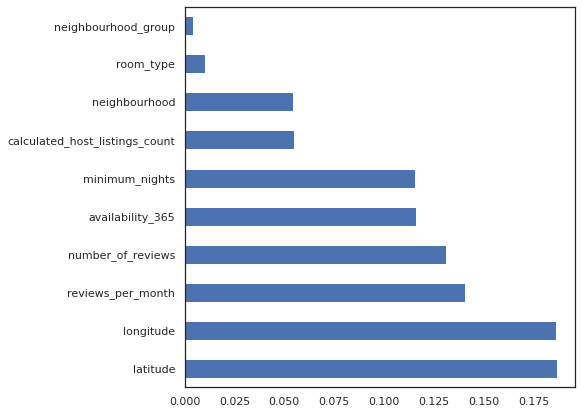

In [95]:
feature_model = ExtraTreesClassifier(n_estimators=10)
feature_model.fit(X_train,y_train)
plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=ss_label_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

###### <h6><b>Standard Scaling + OneHot Encoding + ExtraTreesClassifier</b></h6>

In [96]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(ss_oneHot_X, ss_oneHot_y, 0.2, 42) 

Dimensions of the training feature matrix: (39103, 236)
Dimensions of the training target vector: (39103, 1)
Dimensions of the test feature matrix: (9776, 236)
Dimensions of the test target vector: (9776, 1)


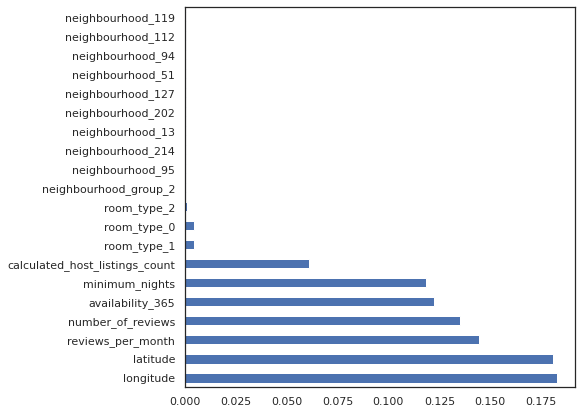

In [97]:
feature_model = ExtraTreesClassifier(n_estimators=10)
feature_model.fit(X_train,y_train)
plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=ss_oneHot_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

###### <h6><b>Robust Scaling + Label Encoding + ExtraTreesClassifier</b></h6>

In [98]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(rs_label_X, rs_label_y, 0.2, 42) 

Dimensions of the training feature matrix: (39103, 10)
Dimensions of the training target vector: (39103, 1)
Dimensions of the test feature matrix: (9776, 10)
Dimensions of the test target vector: (9776, 1)


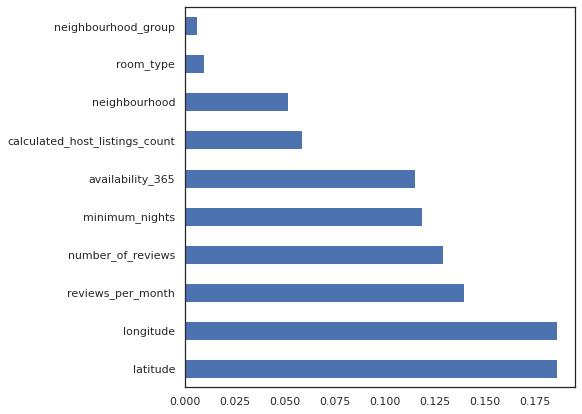

In [99]:
feature_model = ExtraTreesClassifier(n_estimators=10)
feature_model.fit(X_train,y_train)
plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=rs_label_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

###### <h6><b>Robust Scaling + OneHot Encoding + ExtraTreesClassifier</b></h6>

In [100]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(rs_oneHot_X, rs_oneHot_y, 0.2, 42) 

Dimensions of the training feature matrix: (39103, 236)
Dimensions of the training target vector: (39103, 1)
Dimensions of the test feature matrix: (9776, 236)
Dimensions of the test target vector: (9776, 1)


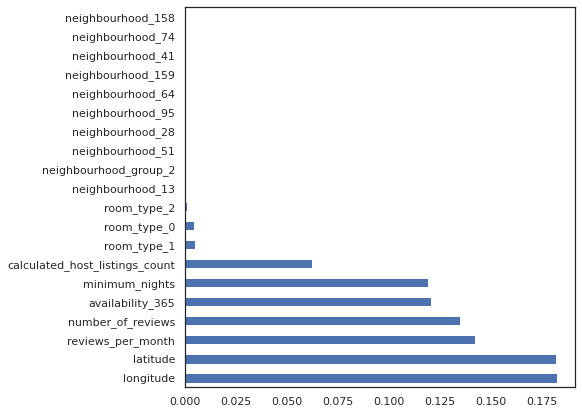

In [101]:
feature_model = ExtraTreesClassifier(n_estimators=10)
feature_model.fit(X_train,y_train)
plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=rs_oneHot_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

###### <h6><b>Min-Max Scaling + Label Encoding + ExtraTreesClassifier</b></h6>

In [102]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(mms_label_X, mms_label_y, 0.2, 42) 

Dimensions of the training feature matrix: (39103, 10)
Dimensions of the training target vector: (39103, 1)
Dimensions of the test feature matrix: (9776, 10)
Dimensions of the test target vector: (9776, 1)


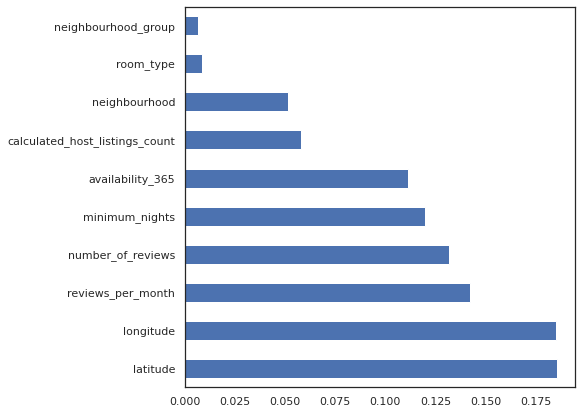

In [103]:
feature_model = ExtraTreesClassifier(n_estimators=10)
feature_model.fit(X_train,y_train)
plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=mms_label_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

###### <h6><b>Min-Max Scaling + OneHot Encoding + ExtraTreesClassifier</b></h6>



In [104]:
# Train - Test split 
# def print_train_test(scaling_encoding_x, scaling_encoding_y, test_size, random_state)
X_train, X_test, y_train, y_test = nyc.print_train_test(mms_oneHot_X, mms_oneHot_y, 0.2, 42) 

Dimensions of the training feature matrix: (39103, 236)
Dimensions of the training target vector: (39103, 1)
Dimensions of the test feature matrix: (9776, 236)
Dimensions of the test target vector: (9776, 1)


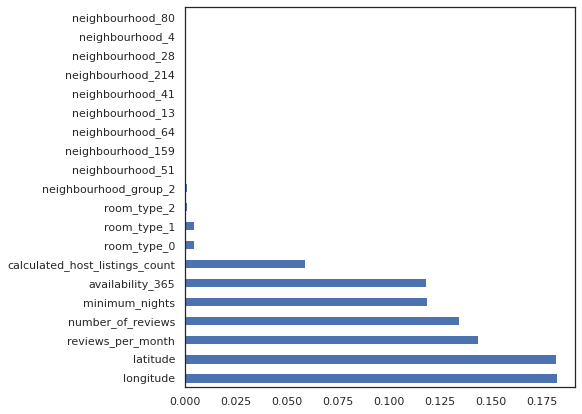

In [105]:
feature_model = ExtraTreesClassifier(n_estimators=10)
feature_model.fit(X_train,y_train)
plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=mms_oneHot_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

#### **Evaluation**
1.   <b>Importing Libaries </b>
2.   <b>K-fold cross validation</b>


In [106]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [107]:
# Using pandas library and 'read_csv' function to read
airbnb = pd.read_csv('https://raw.githubusercontent.com/Exploratory-Data-Analysis/New-York-City-Airbnb-Investment-Recommendation/main/AB_NYC_2019.csv')

airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64748999999999768,-73.97236999999999796,Private room,149,1,9,2018-10-19,0.20999999999999999,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75361999999999796,-73.98377000000000692,Entire home/apt,225,1,45,2019-05-21,0.38000000000000000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80901999999999674,-73.94190000000000396,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68513999999999697,-73.95976000000000283,Entire home/apt,89,1,270,2019-07-05,4.63999999999999968,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851000000000028,-73.94398999999999944,Entire home/apt,80,10,9,2018-11-19,0.10000000000000001,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853000000000208,-73.94995000000000118,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70183999999999713,-73.93317000000000405,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81474999999999653,-73.94867000000000701,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751000000000346,-73.99111999999999512,Shared room,55,1,0,NaN,NaN,6,2


In [108]:

model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier(random_state=42)

scores = cross_val_score(model_dt, airbnb, )

NameError: ignored

In [ ]:
Kfold = KFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(model_dt)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=200)

In [ ]:
for i, (a,b) in enumerate(kf.split(Processed_sc_label, label)):
  print(i)
  print(f'train : {a[:10]}\nvalid : {b[:10]}', '\n')

In [ ]:
for i, (a, b) in enumerate(kf.split(Processed_sc_label, label)):
  print(i)
  print(f'train : {len(a)} // valid : {len(b)}', '\n')

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=200)

In [ ]:
val_scores = []
n_iter = 0

for i, (trn_idx, val_idx) in enumerate(skf.split(Processed_sc_label, label)):
    
    X_train, y_train = Processed_sc_label.iloc[trn_idx, :], label[trn_idx,]
    X_valid, y_valid = Processed_sc_label.iloc[val_idx, :], label[val_idx,]

    X_train, X_valid, _ = preprocess(X_train, X_valid, X_test)

    print(i)
    print(f'train : {len(X_train)} // valid : {len(X_valid)}')
    clf = RandomForestClassifier(random_state = 200)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    score = f1_score(y_valid, y_pred)
    
    print('Valid f1 score {:.6f}\n'.format(score))

    val_scores.append(score)

print('Cross validation Score : {:.4f}'.format(np.mean(val_scores)))

## <b>References</b>

1. New York City Airbnb Open Data [Link](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data)

2. Data Exploration on NYC Airbnb [Link](https://www.kaggle.com/code/dgomonov/data-exploration-on-nyc-airbnb)
3. Airbnb Analysis, Visualization and Prediction [Link](https://www.kaggle.com/code/chirag9073/airbnb-analysis-visualization-and-prediction)
4. Analysis of Airbnb Data - New York City [Link](https://www.kaggle.com/code/faressayah/analysis-of-airbnb-data-new-york-city)
5. Understand your data 🎲 | airbnb reservations [Link](https://www.kaggle.com/code/upadorprofzs/understand-your-data-airbnb-reservations)
6. Airbnb Analysis, Visualization and Prediction [Link](https://www.kaggle.com/code/chirag9073/airbnb-analysis-visualization-and-prediction/notebook)

